In [1]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Looking for missing values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Looing into info for the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

C:\Users\Anders\AppData\Local\Temp\ipykernel_16344\1034364300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


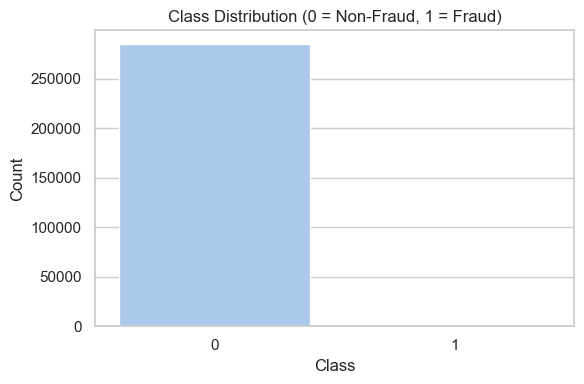

In [ ]:
# Looking into the class distribution
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Class Distribution

As shown in the plot above, the dataset is highly imbalanced. The vast majority of transactions are non-fraudulent (Class = 0), while fraudulent transactions (Class = 1) represent only a tiny fraction of the data.

This imbalance is typical in fraud detection tasks and highlights the importance of using SMOTE and appropriate evaluation metrics (e.g. recall, precision, F1-score, AUC) and resampling strategies during model training.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Train-test split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=10
)

# Scaling 'Time' and 'Amount' after splitting (and fit only on train)
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Step 3: Apply SMOTE only on the training set
smote = SMOTE(random_state=10)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Check new class balance
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())



Class distribution after SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64


### Handling Class Imbalance with SMOTE

To address the extreme imbalance in the dataset, i apply **Synthetic Minority Oversampling Technique (SMOTE)** to the training data.

Steps taken:

1. The `Time` and `Amount` features are scaled using `StandardScaler`, as they are not PCA-transformed like the other variables.
2. The dataset is split into training and test sets with stratification to maintain the original class distribution.
3. **SMOTE** is applied *only* to the training set to synthetically generate new samples of the minority class (fraud), resulting in a balanced dataset for model training.

This prepares the data for fair and effective model evaluation using metrics such as precision, recall, F1-score, and AUC.


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Parameter space
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers support 'l1' and 'l2'
}

# Initialize model
logreg = LogisticRegression(max_iter=1000, random_state=10)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Fit model on resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best estimator
best_logreg = random_search.best_estimator_

# Predict on original test set
y_pred_lr = best_logreg.predict(X_test)
y_proba_lr = best_logreg.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("\nLogistic Regression – Classification Report")
print(classification_report(y_test, y_pred_lr, digits=4))

auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"AUC: {auc_lr:.4f}")




Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

Logistic Regression – Classification Report
              precision    recall  f1-score   support

           0     0.9998    0.9764    0.9880     85295
           1     0.0624    0.9054    0.1168       148

    accuracy                         0.9763     85443
   macro avg     0.5311    0.9409    0.5524     85443
weighted avg     0.9982    0.9763    0.9865     85443

AUC: 0.9808


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# arameter distributions for random search
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dtree = DecisionTreeClassifier(random_state=10)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dtree,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,
    scoring='roc_auc',
    random_state=10,
    n_jobs=-1
)

# Fit on resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_dtree = random_search.best_estimator_

# Predict on test set
y_pred_dt = best_dtree.predict(X_test)
y_proba_dt = best_dtree.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("\nDecision Tree – Classification Report")
print(classification_report(y_test, y_pred_dt, digits=4))

auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"AUC: {auc_dt:.4f}")




Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'entropy'}

Decision Tree – Classification Report
              precision    recall  f1-score   support

           0     0.9997    0.9980    0.9989     85295
           1     0.4232    0.8378    0.5624       148

    accuracy                         0.9977     85443
   macro avg     0.7115    0.9179    0.7806     85443
weighted avg     0.9987    0.9977    0.9981     85443

AUC: 0.9315


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Parameter distributions
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=10)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10, 
    scoring='roc_auc',
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_rf = random_search.best_estimator_

# Predict on test set
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("\nRandom Forest – Classification Report")
print(classification_report(y_test, y_pred_rf, digits=4))

auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"AUC: {auc_rf:.4f}")




Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Random Forest – Classification Report
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     85295
           1     0.8601    0.8311    0.8454       148

    accuracy                         0.9995     85443
   macro avg     0.9299    0.9154    0.9225     85443
weighted avg     0.9995    0.9995    0.9995     85443

AUC: 0.9833


### XGBoost (with SMOTE)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Parameter distributions
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,  # Try 10 random combinations
    scoring='roc_auc',
    cv=5,
    random_state=10,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Best estimator
best_xgb = random_search.best_estimator_

# Predict on test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("\nXGBoost – Classification Report")
print(classification_report(y_test, y_pred_xgb, digits=4))

auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"AUC: {auc_xgb:.4f}")



C:\Users\Anders\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:41:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9}

XGBoost – Classification Report
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     85295
           1     0.8435    0.8378    0.8407       148

    accuracy                         0.9994     85443
   macro avg     0.9216    0.9188    0.9202     85443
weighted avg     0.9994    0.9994    0.9994     85443

AUC: 0.9872


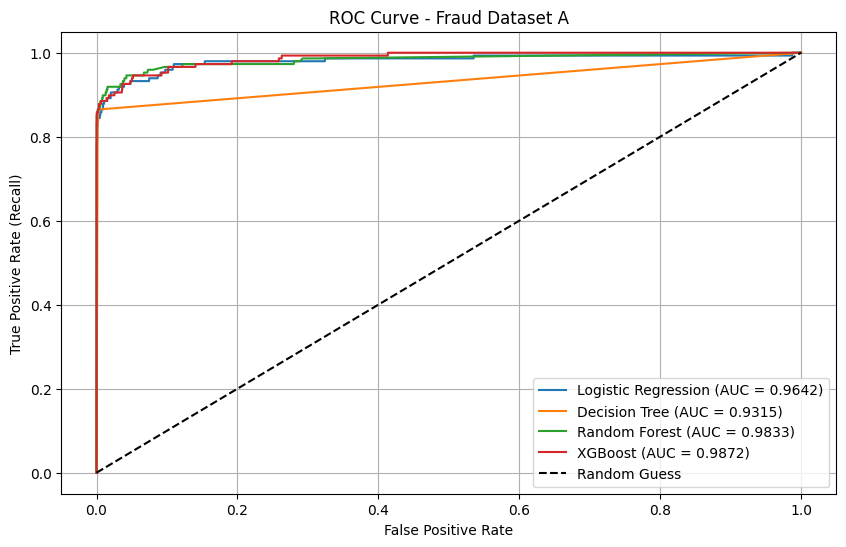

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curves and AUCs
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Fraud Dataset A')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()